# Briefing

This notebook is intended to understand the provided weather data collected in Central Park, NYC, US (latitude: 40.779, longitude: -73.9693) at an elevation of 42.7 m.

# Setup and Config

In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
color = sns.color_palette()

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%config InlineBackend.figure_format = 'retina'

In [39]:
def get_nulls(col):
    nulls = col.isnull().sum()
    print(f'\nNull count: {nulls}')
    print(f'Null ratio: {float(nulls / len(col))}')

In [40]:
def find_missing(data):
    missing_cnt = data.isnull().sum().values
    total = data.shape[0]
    missing_ratio = missing_cnt / total
    
    return pd.DataFrame(data={'missing_cnt': missing_cnt,
                              'missing_ratio': missing_ratio}, 
                        index=data.columns.values)

In [41]:
def plot_categorical(data, col, size=[6,4], xlabel_angle=0):
    """ use this for ploting the count of categorical features """
    # absolute values
    plotdata = data[col].value_counts()
    
    f, ax = plt.subplots(figsize=(size[0],size[1]))
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_title("Abs. count frequencies of column: %s" % col)
    
    if xlabel_angle != 0:
        plt.xticks(rotation=xlabel_angle)
    
    sns.barplot(x = plotdata.index, y=plotdata.values)
    
    # relative values
    plotdata = data[col].value_counts(normalize=True)
    
    f, ax = plt.subplots(figsize=(size[0],size[1]))
    ax.set_title("Rel. count frequencies of column: %s" % col)
    
    if xlabel_angle != 0:
        plt.xticks(rotation=xlabel_angle)
    
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.show()

# Load and Validate Data (Plausibility Checks)

In [42]:
from pathlib import Path

weather_data_all = pd.read_csv(str(Path().home() / 'repos/nyc-taxi/resources/weather/NOAA_Central_Park_data.csv'))

## First Glance at the Data

In [43]:
weather_data_all.shape

(3287, 68)

In [44]:
weather_data_all.head(8).T

,0,1,2,3,4,5,6,7
STATION,USW00094728,USW00094728,USW00094728,USW00094728,USW00094728,USW00094728,USW00094728,USW00094728
NAME,"NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US","NY CITY CENTRAL PARK, NY US"
LATITUDE,40.779,40.779,40.779,40.779,40.779,40.779,40.779,40.779
LONGITUDE,-73.9693,-73.9693,-73.9693,-73.9693,-73.9693,-73.9693,-73.9693,-73.9693
ELEVATION,42.7,42.7,42.7,42.7,42.7,42.7,42.7,42.7
DATE,2009-01-01,2009-01-02,2009-01-03,2009-01-04,2009-01-05,2009-01-06,2009-01-07,2009-01-08
AWND,5,2.8,4.5,3.4,3.1,3,4.7,5.1
AWND_ATTRIBUTES,",,W",",,W",",,W",",,W",",,W",",,W",",,W",",,W"
FMTM,615,959,1209,13,1023,2318,609,1813
FMTM_ATTRIBUTES,",,X",",,X",",,X",",,X",",,X",",,X",",,X",",,X"


In [45]:
# check time interval of provided weather data

weather_data_all['DATE'].min(), weather_data_all['DATE'].max()

('2009-01-01', '2017-12-31')

The data set contains 9 years of weather data from 1 January 2009 to 31 December 2017.

In [46]:
# validate all data points are collected at the same weather station and there are no corrupted data points

(weather_data_all['LATITUDE'].unique().shape[0]
 == weather_data_all['LATITUDE'].unique().shape[0]
 == weather_data_all['STATION'].unique().shape[0]
 == weather_data_all['NAME'].unique().shape[0]
 == weather_data_all['ELEVATION'].unique().shape[0]
)

True

## Check for NULL values

In [47]:
find_missing(weather_data_all)

,missing_cnt,missing_ratio
STATION,0,0.000000
NAME,0,0.000000
LATITUDE,0,0.000000
LONGITUDE,0,0.000000
ELEVATION,0,0.000000
DATE,0,0.000000
AWND,35,0.010648
AWND_ATTRIBUTES,35,0.010648
FMTM,2284,0.694859
FMTM_ATTRIBUTES,2284,0.694859


All of the WT* variables (different weather types) have more than 68% missing values, most even more than 95%. For the first iteration, these variables are ignored since there is only very little information available to map it to the entire period of available taxi data.

The variables that will be further analysed are AWND, PRCP, SNOW, SNWD, TMAX, TMIN, WDF2, WDF5, WSF2 and WSF5. The attributes are optional and can contain a measurement flag, quality flag, source flag and time of observation. Since these attributes have only little relevance for this analysis, they are omitted.

In [48]:
selected_features = ['DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']

In [49]:
weather_data = weather_data_all[selected_features].set_index('DATE')

# Basic Statistics for Weather Features

In [50]:
weather_data.describe()

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,3252.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3270.000000,3237.000000,3272.000000,3237.000000
mean,2.499139,3.422026,2.679039,14.155461,17.369151,9.457530,196.944343,200.680568,6.404095,10.002657
std,1.103753,9.764259,22.806340,60.408680,10.176563,9.278581,99.833097,97.638254,1.795019,2.933684
min,0.100000,0.000000,0.000000,0.000000,-9.300000,-18.200000,10.000000,5.000000,2.700000,4.000000
25%,1.700000,0.000000,0.000000,0.000000,9.400000,2.200000,80.000000,120.000000,5.400000,7.600000
50%,2.300000,0.000000,0.000000,0.000000,18.300000,10.000000,240.000000,240.000000,6.300000,9.800000
75%,3.100000,1.300000,0.000000,0.000000,26.100000,17.800000,280.000000,280.000000,7.200000,11.600000
max,10.200000,147.600000,693.000000,584.000000,40.000000,28.900000,360.000000,360.000000,17.000000,27.700000


# Distributions of Numerical Variables

## Weather

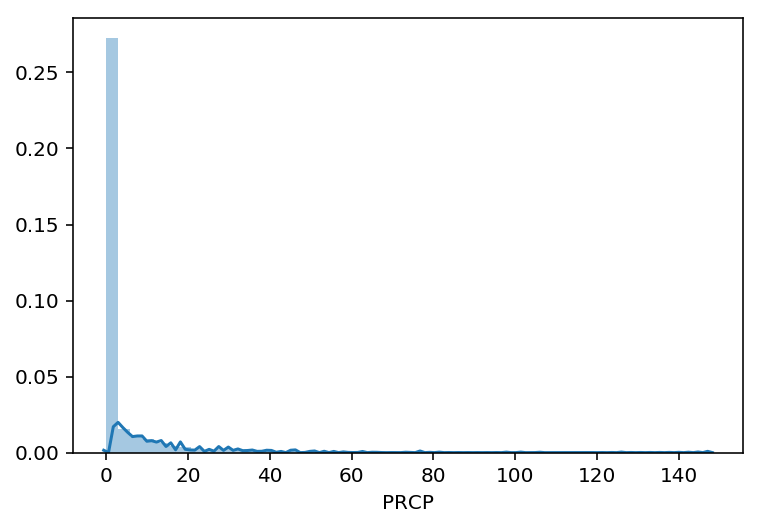

In [51]:
sns.distplot(weather_data['PRCP'])

# Visualisation of Timely Patterns of Numerical Variables

Plot variables together based on their scale. Precipitation is separate since explicitely analysed in the assignment.

## Weather

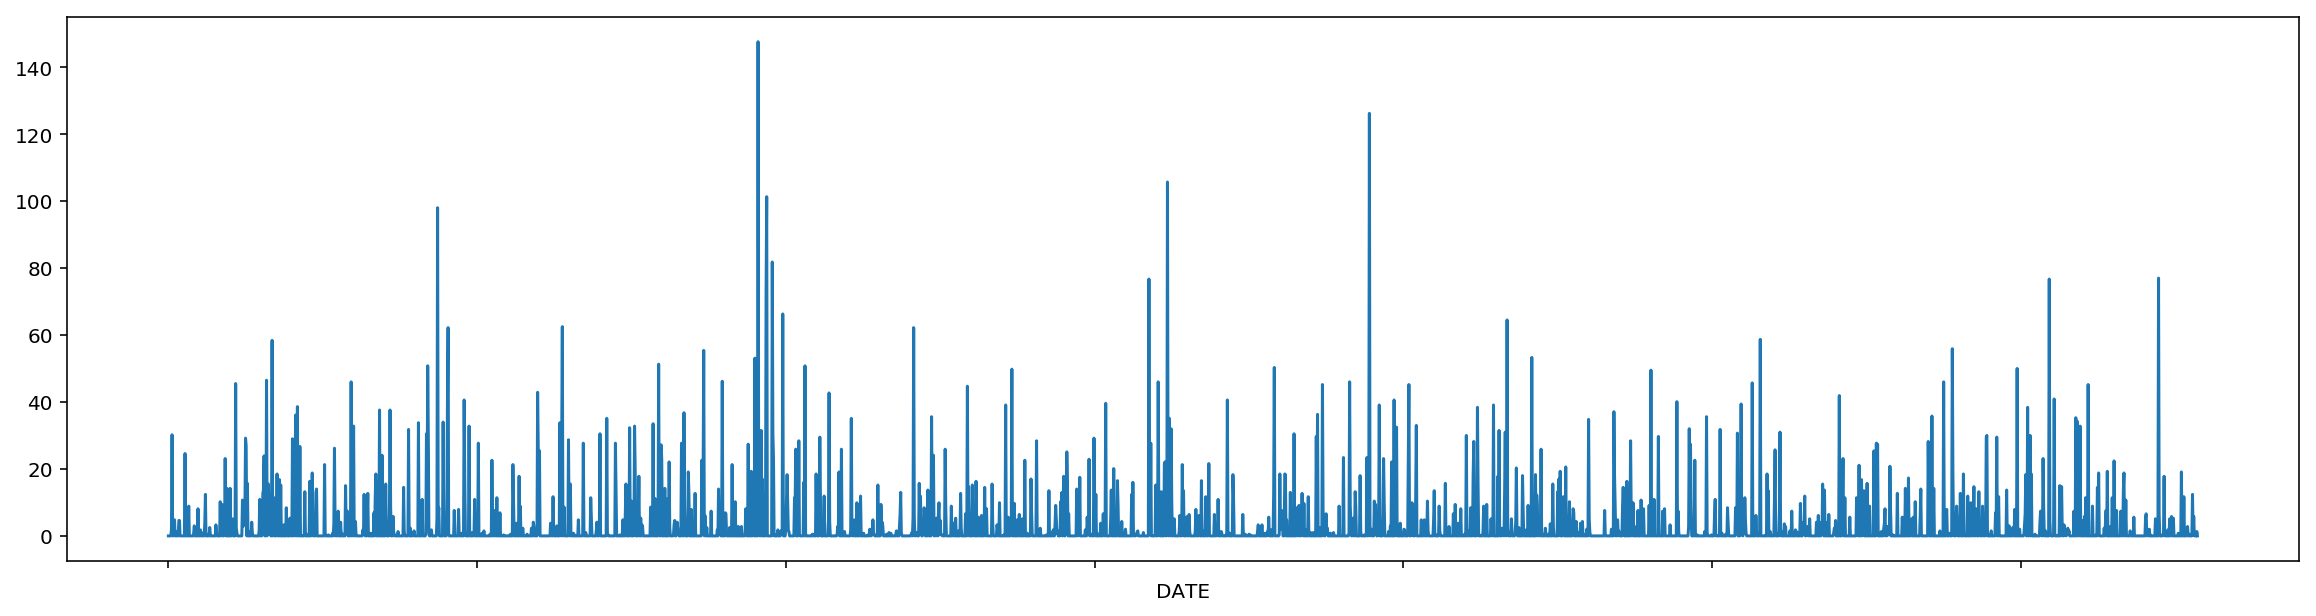

In [35]:
weather_data['PRCP'].plot(figsize=(20, 5))

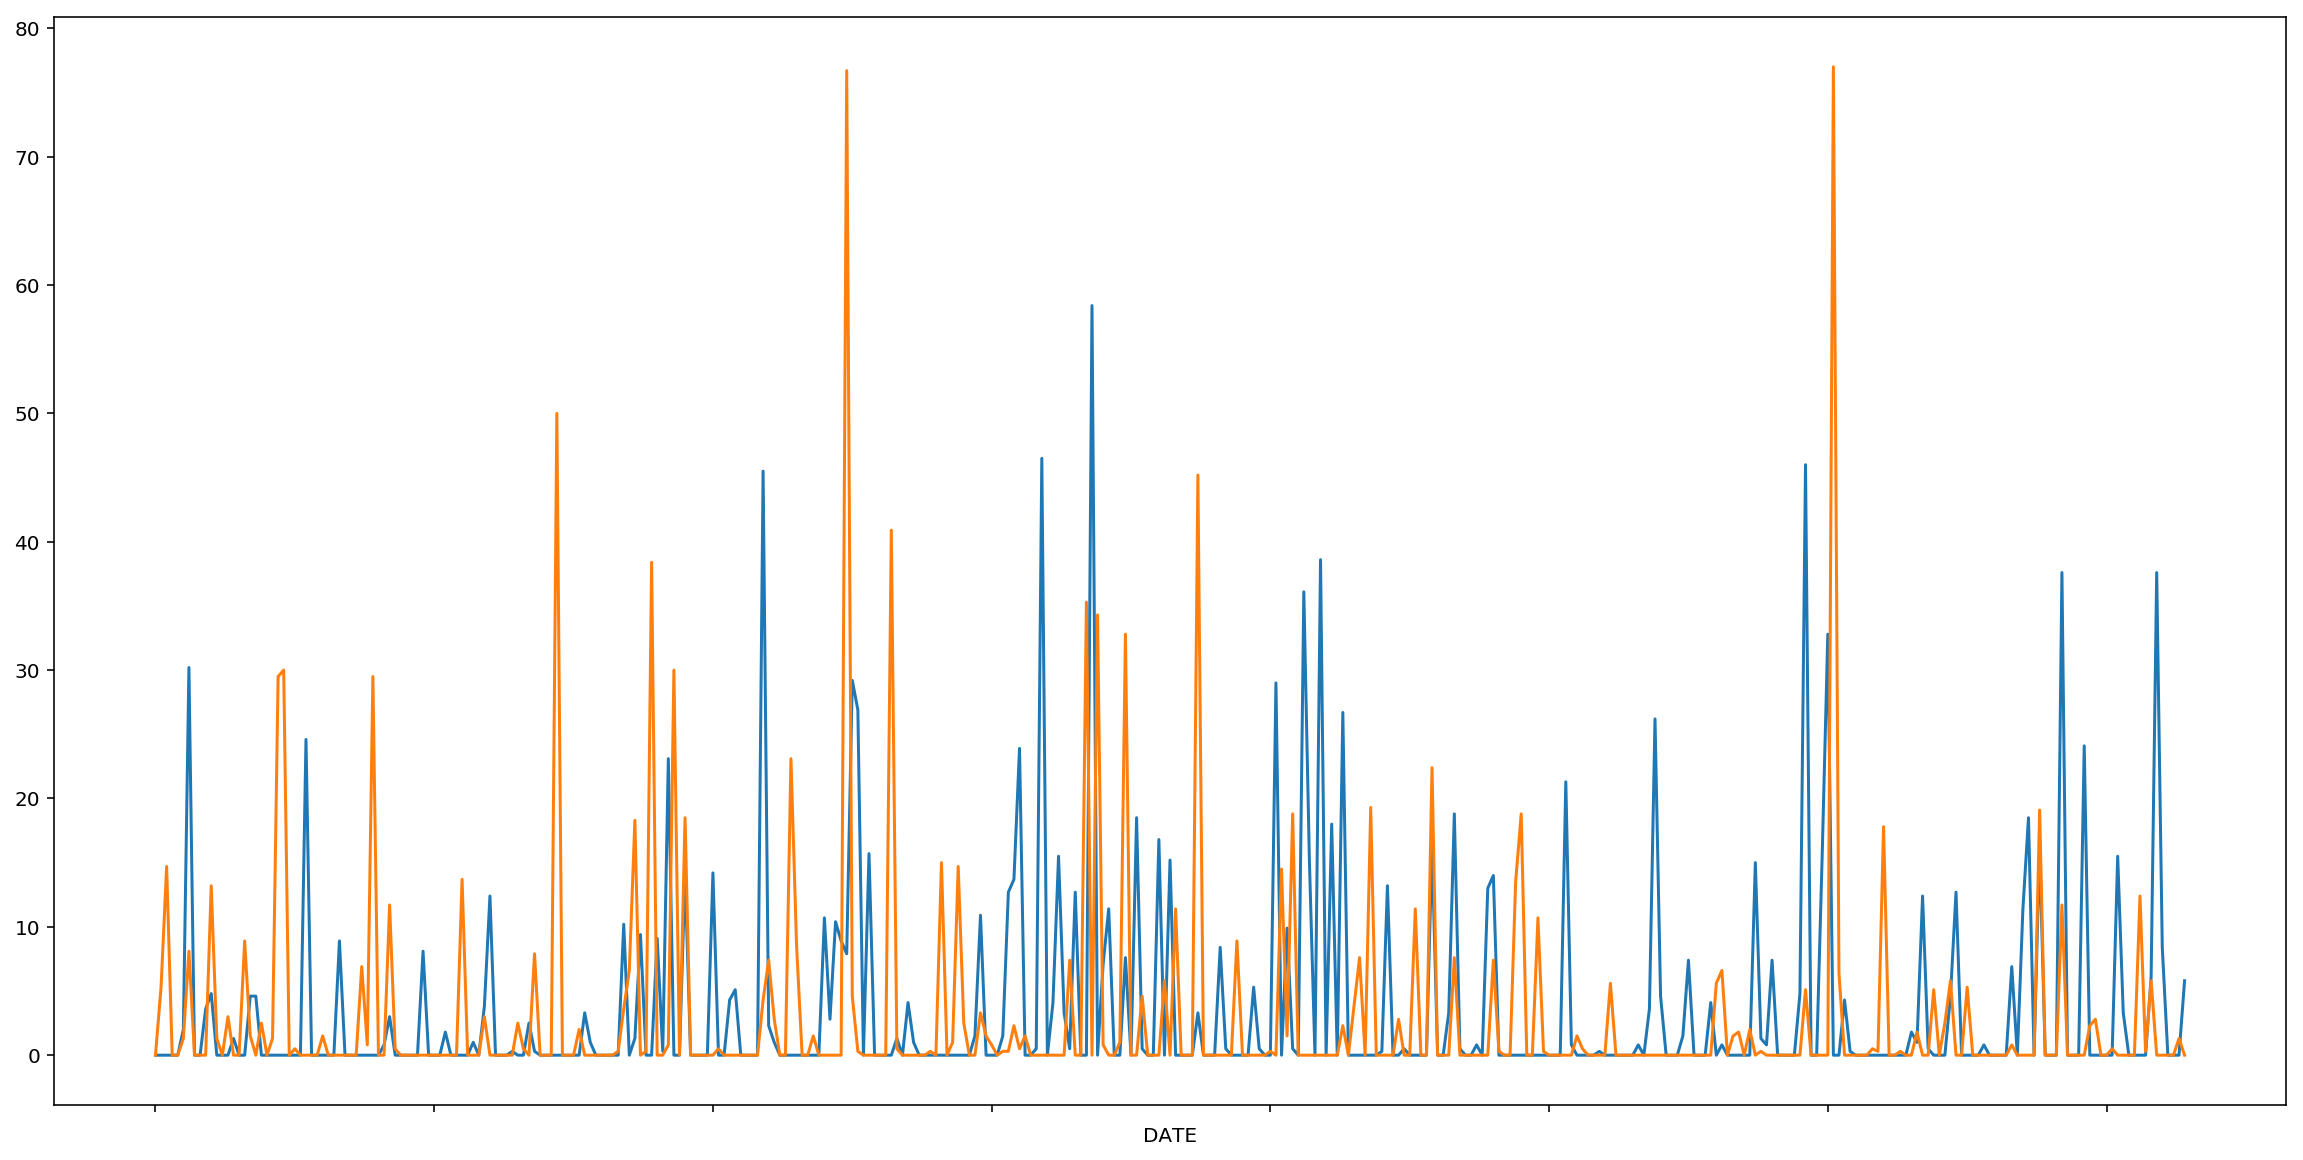

In [36]:
weather_data['PRCP'].loc['2009-01-01':'2009-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2010-01-01':'2010-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2011-01-01':'2011-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2012-01-01':'2012-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2013-01-01':'2013-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2014-01-01':'2014-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2015-01-01':'2015-12-31'].plot(figsize=(20, 10))
# weather_data['PRCP'].loc['2016-01-01':'2016-12-31'].plot(figsize=(20, 10))
weather_data['PRCP'].loc['2017-01-01':'2017-12-31'].plot(figsize=(20, 10))

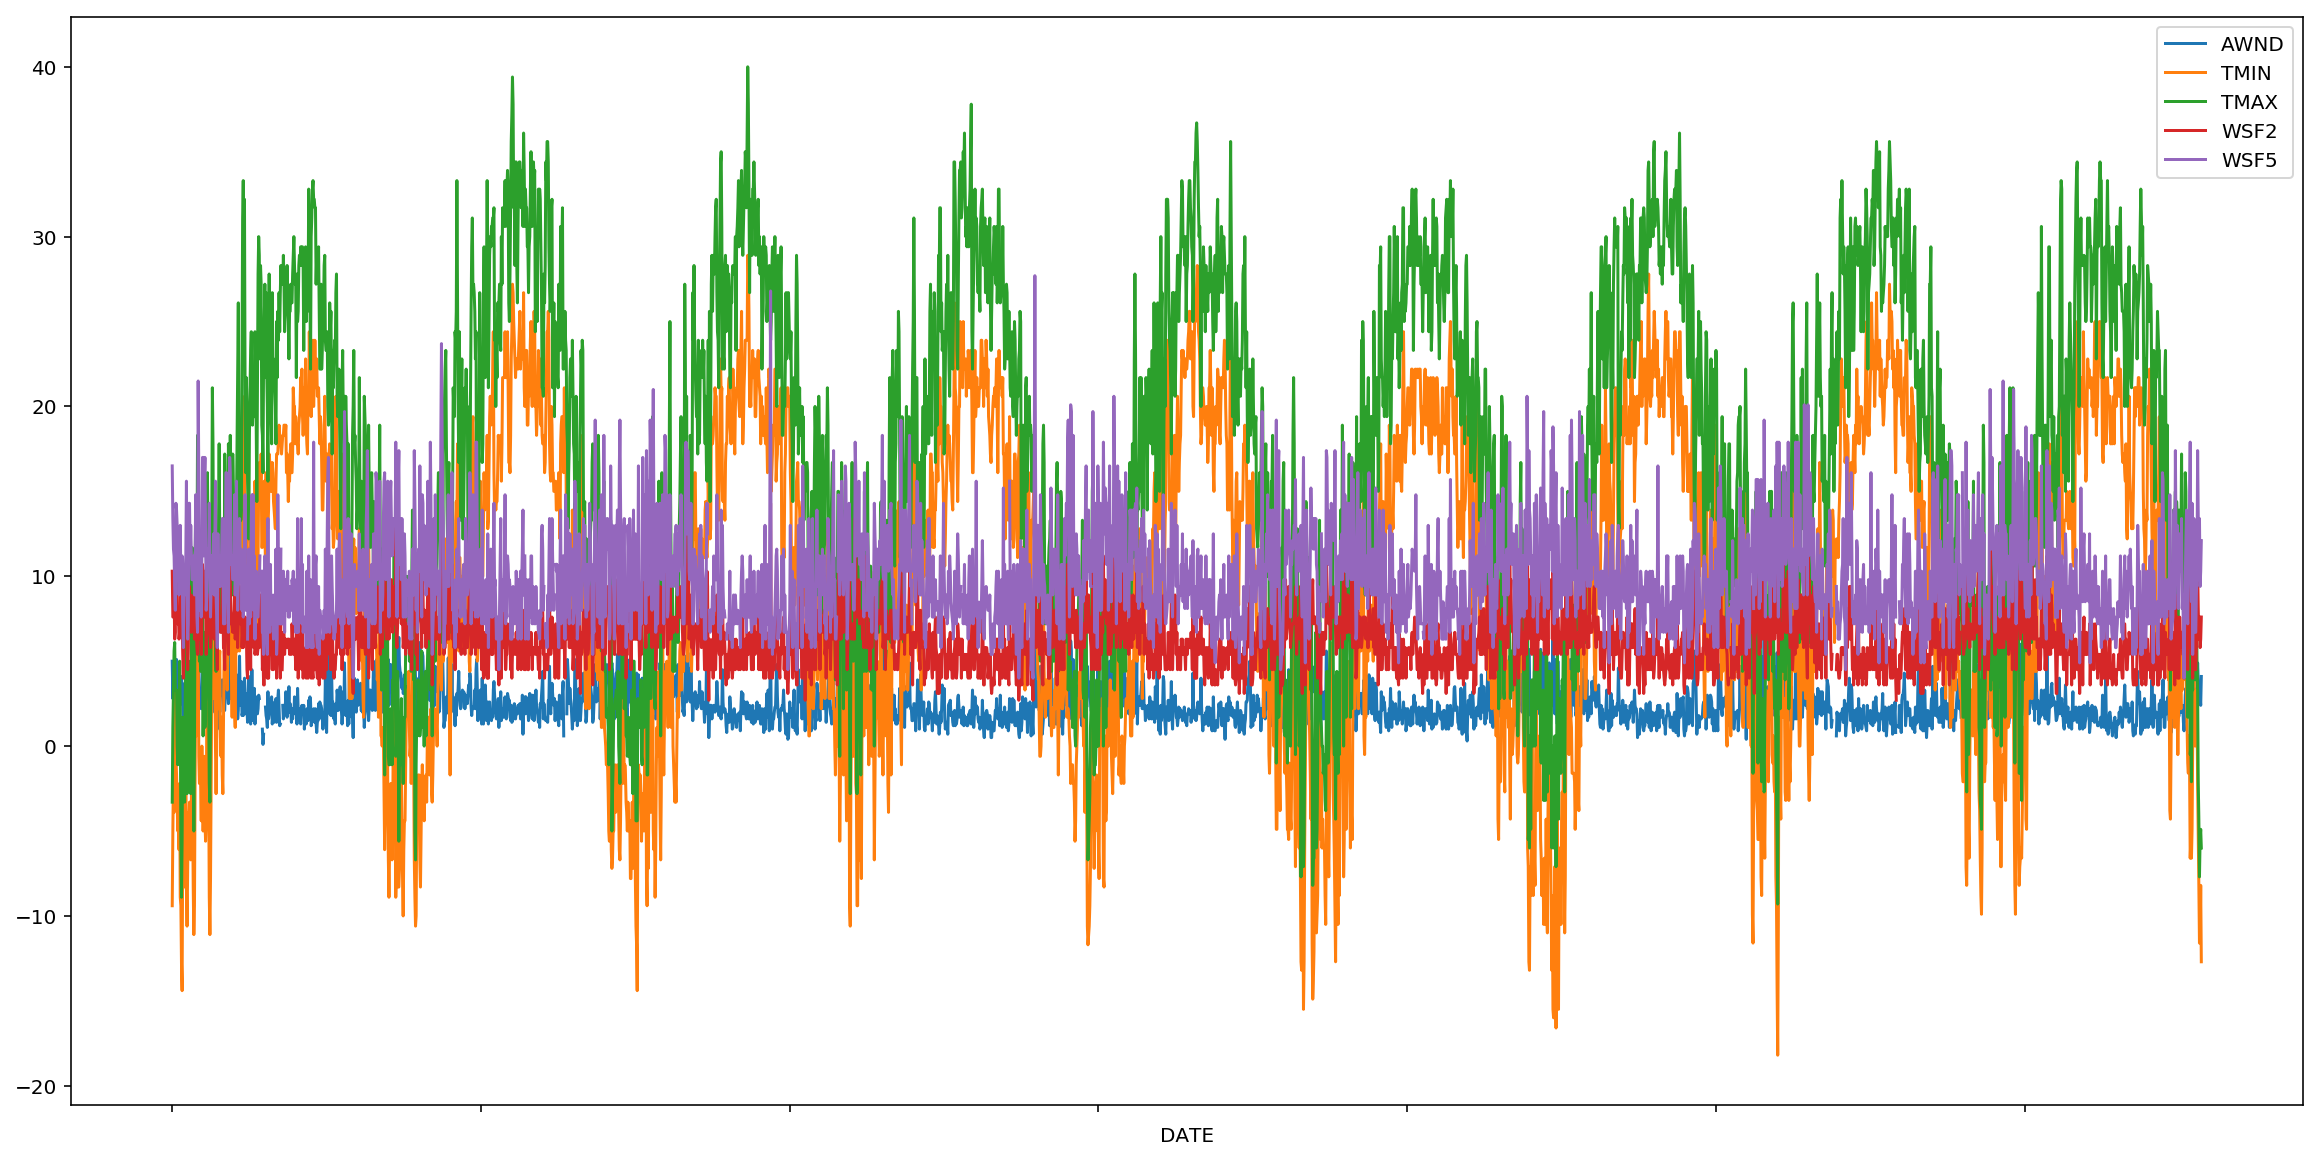

In [110]:
weather_data[['AWND', 'TMIN', 'TMAX', 'WSF2', 'WSF5']].plot(figsize=(20, 10))

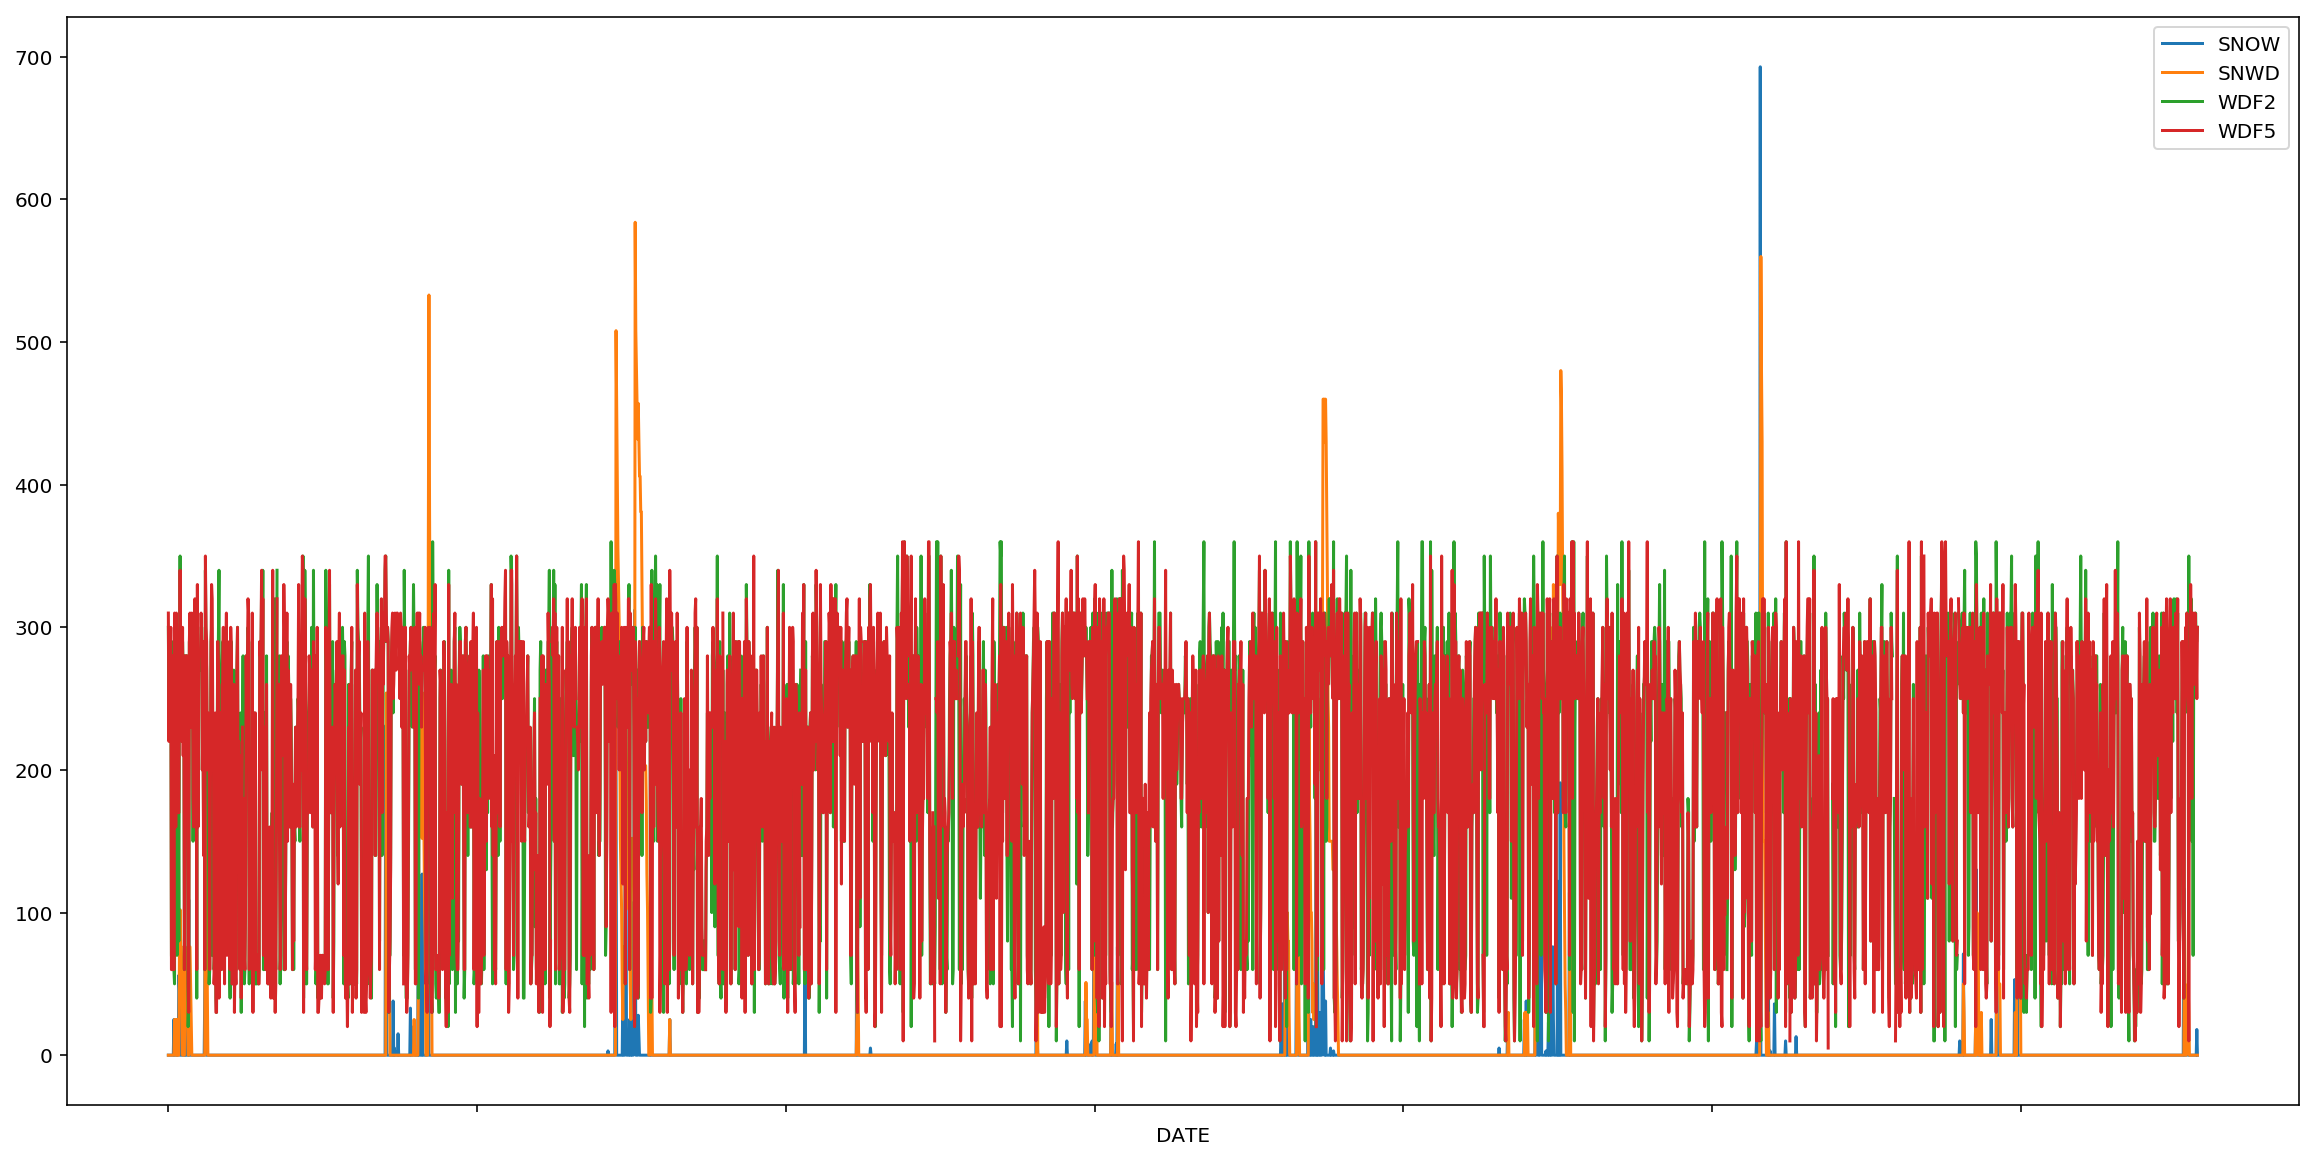

In [111]:
weather_data[['SNOW', 'SNWD', 'WDF2', 'WDF5']].plot(figsize=(20, 10))